# **LRT Key Performance Indicator**

**Author/s: Anton Reyes** 

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [493]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### **Datasets and Files**

The following `csv` files were used for this project:

- `passenger_traffic.csv` contains the passengers per month (in millions)
- `peak_hour_trainsets_running.csv` contains the number of trains that run at peak hours per month.

## **Data Collection**

Importing the dataset using pandas.

In [495]:
traffic_df = pd.read_csv("datasets\passenger_traffic.csv")
peak_df = pd.read_csv("datasets\peak_hour_trainsets_running.csv")

display(traffic_df, peak_df)

,MONTH,2018,2019,2020,2021,2022,2023
0,JANUARY,5.79,5.59,3.23,0.94,1.08,3.91
1,FEBRUARY,5.44,5.05,3.08,1.00,1.42,3.86
2,MARCH,5.21,5.61,1.26,0.93,1.96,4.20
3,APRIL,4.90,4.11,0.00,0.46,1.77,NaN
4,MAY,4.97,4.84,0.00,0.81,2.35,NaN
5,JUNE,4.87,4.74,0.66,0.80,2.63,NaN
6,JULY,5.35,5.59,0.85,1.01,2.79,NaN
7,AUGUST,5.82,5.69,0.33,0.73,3.14,NaN
8,SEPTEMBER,5.57,5.94,0.72,0.93,3.32,NaN
9,OCTOBER,6.01,3.28,0.75,1.15,3.65,NaN


,MONTH,2018,2019,2020,2021,2022,2023
0,JANUARY,8,8,5,5,8,8.0
1,FEBRUARY,8,8,5,5,8,9.0
2,MARCH,8,7,5,5,8,9.0
3,APRIL,8,7,0,5,8,NaN
4,MAY,9,7,0,5,8,NaN
5,JUNE,8,7,5,5,9,NaN
6,JULY,8,7,5,6,9,NaN
7,AUGUST,8,7,5,7,9,NaN
8,SEPTEMBER,8,5,5,8,9,NaN
9,OCTOBER,8,5,5,8,9,NaN


## **Description of the Dataset**

Here, we find the shape of the datasets.

In [496]:
traffic_df.shape

(13, 7)

In [497]:
peak_df.shape

(13, 7)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [498]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MONTH   13 non-null     object 
 1   2018    13 non-null     float64
 2   2019    13 non-null     float64
 3   2020    13 non-null     float64
 4   2021    13 non-null     float64
 5   2022    13 non-null     float64
 6   2023    4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 856.0+ bytes


In [499]:
peak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MONTH   13 non-null     object 
 1   2018    13 non-null     int64  
 2   2019    13 non-null     int64  
 3   2020    13 non-null     int64  
 4   2021    13 non-null     int64  
 5   2022    13 non-null     int64  
 6   2023    4 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 856.0+ bytes


In [500]:
traffic_df.describe()

,2018,2019,2020,2021,2022,2023
count,13.000000,13.000000,13.000000,13.000000,13.000000,4.000000
mean,9.953077,8.766923,1.923846,1.821538,4.866923,5.967500
std,16.453206,14.519378,3.333321,3.026499,8.093326,3.957839
min,4.870000,3.090000,0.000000,0.460000,1.080000,3.860000
25%,5.210000,4.110000,0.660000,0.810000,1.960000,3.897500
50%,5.440000,5.050000,0.750000,0.940000,2.790000,4.055000
75%,5.790000,5.610000,1.260000,1.150000,3.650000,6.125000
max,64.700000,56.980000,12.500000,11.840000,31.640000,11.900000


In [501]:
peak_df.describe()

,2018,2019,2020,2021,2022,2023
count,13.000000,13.000000,13.000000,13.000000,13.000000,4.00
mean,8.076923,6.538462,4.153846,6.153846,8.615385,8.75
std,0.277350,1.126601,1.863963,1.281025,0.506370,0.50
min,8.000000,5.000000,0.000000,5.000000,8.000000,8.00
25%,8.000000,5.000000,5.000000,5.000000,8.000000,8.75
50%,8.000000,7.000000,5.000000,6.000000,9.000000,9.00
75%,8.000000,7.000000,5.000000,7.000000,9.000000,9.00
max,9.000000,8.000000,5.000000,8.000000,9.000000,9.00


## **Exploratory Data Analysis**

***Questions to answer:***

1. Which month has the most passenger traffic? Which has the least?
2. What is the average number of trains per month?
3. Is there a correlation between the average number of trains and the total number of traffic per year?
4. Is there a correlation between the traffic and number of train dataframes?

### **1. Which month has the most passenger traffic? Which has the least?**

***Note: This is in millions***

In [502]:
traffic_transposed = traffic_df[["MONTH","2018","2019","2020","2021","2022"]].T

In [503]:
traffic_transposed.columns = traffic_transposed.iloc[0]
traffic_transposed = traffic_transposed.drop(traffic_transposed.index[0])
traffic_transposed = traffic_transposed.drop("TOTAL", axis=1)
traffic_transposed = traffic_transposed.apply(pd.to_numeric, errors='coerce')

In [504]:
traffic_transposed.max()

MONTH
JANUARY      5.79
FEBRUARY     5.44
MARCH        5.61
APRIL        4.90
MAY          4.97
JUNE         4.87
JULY         5.59
AUGUST       5.82
SEPTEMBER    5.94
OCTOBER      6.01
NOVEMBER     5.47
DECEMBER     5.29
dtype: float64

In [505]:
traffic_transposed.min()

MONTH
JANUARY      0.94
FEBRUARY     1.00
MARCH        0.93
APRIL        0.00
MAY          0.00
JUNE         0.66
JULY         0.85
AUGUST       0.33
SEPTEMBER    0.72
OCTOBER      0.75
NOVEMBER     0.73
DECEMBER     0.90
dtype: float64

In [506]:
traffic_transposed.mean().round(1)

MONTH
JANUARY      3.3
FEBRUARY     3.2
MARCH        3.0
APRIL        2.2
MAY          2.6
JUNE         2.7
JULY         3.1
AUGUST       3.1
SEPTEMBER    3.3
OCTOBER      3.0
NOVEMBER     2.9
DECEMBER     3.0
dtype: float64

### **2. What is the average number of trains per month?**

In [507]:
peak_transposed = peak_df[["MONTH","2018","2019","2020","2021","2022"]].T

In [508]:
peak_transposed.columns = peak_transposed.iloc[0]
peak_transposed = peak_transposed.drop(peak_transposed.index[0])
peak_transposed = peak_transposed.drop("AVERAGE", axis=1)
peak_transposed = peak_transposed.apply(pd.to_numeric, errors='coerce')

In [509]:
peak_transposed.mean().round()

MONTH
JANUARY      7.0
FEBRUARY     7.0
MARCH        7.0
APRIL        6.0
MAY          6.0
JUNE         7.0
JULY         7.0
AUGUST       7.0
SEPTEMBER    7.0
OCTOBER      7.0
NOVEMBER     7.0
DECEMBER     7.0
dtype: float64

In [510]:
peak_transposed.describe()

MONTH,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,6.800000,6.800000,6.600000,5.600000,5.800000,6.800000,7.000000,7.20000,7.000000,7.000000,7.000000,6.800000
std,1.643168,1.643168,1.516575,3.361547,3.563706,1.788854,1.581139,1.48324,1.870829,1.870829,1.870829,1.788854
min,5.000000,5.000000,5.000000,0.000000,0.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,7.00000,5.000000,5.000000,5.000000,5.000000
50%,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,8.000000,8.000000,8.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000
max,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000


### **3. Is there a correlation between the average number of trains and the total number of traffic per year?**

In [517]:
traffic_total = traffic_df.loc[[12]].reset_index(drop=True)
peak_average = peak_df.loc[[12]].reset_index(drop=True)

In [518]:
concat = pd.concat([traffic_total, peak_average], axis=0)

In [519]:
#drop the index column
concat = concat.reset_index(drop=True)
concat = concat.T

In [520]:
#make first rwo the column names and drop the first row
concat.columns = concat.iloc[0]
concat = concat.drop(concat.index[0])


In [521]:
#convert object to numeric
concat = concat.apply(pd.to_numeric, errors='coerce')

concat

MONTH,TOTAL,AVERAGE
2018,64.70,8.0
2019,56.98,7.0
2020,12.50,4.0
2021,11.84,6.0
2022,31.64,9.0
2023,11.90,9.0


In [522]:
#rename columns
concat.columns = ["traffic_total", "peak_average"]
concat

,traffic_total,peak_average
2018,64.70,8.0
2019,56.98,7.0
2020,12.50,4.0
2021,11.84,6.0
2022,31.64,9.0
2023,11.90,9.0


<AxesSubplot:>

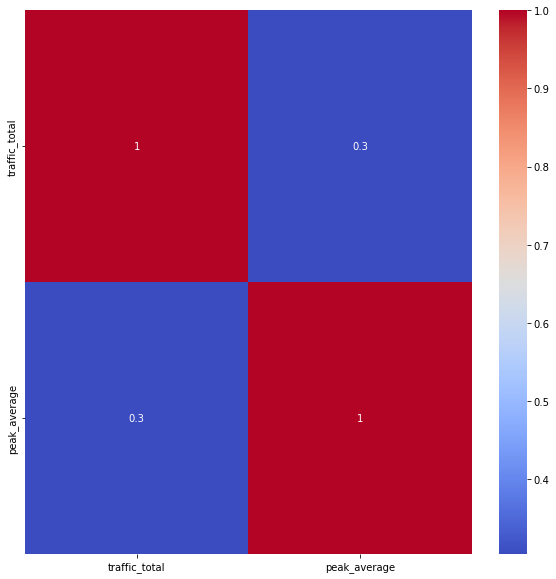

In [523]:
#heatmap correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(concat.corr(), annot=True, cmap="coolwarm")

### **4. Is there a correlation between the traffic and number of train dataframes?**

In [551]:
months = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE','JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

In [552]:
corr_df = pd.DataFrame(peak_transposed[months].corrwith(traffic_transposed[months]))

corr_df

,0
MONTH,
JANUARY,0.483678
FEBRUARY,0.521069
MARCH,0.645670
APRIL,0.733582
MAY,0.809763
JUNE,0.681796
JULY,0.570123
AUGUST,0.534495
SEPTEMBER,-0.009740


In [553]:
corr_df.columns = ["correlation"]

#reset index for column names
corr_df = corr_df.reset_index()

In [555]:
corr_df.sort_values(by="correlation", ascending=False)

,MONTH,correlation
4,MAY,0.809763
3,APRIL,0.733582
5,JUNE,0.681796
2,MARCH,0.645670
11,DECEMBER,0.642516
6,JULY,0.570123
7,AUGUST,0.534495
1,FEBRUARY,0.521069
0,JANUARY,0.483678
10,NOVEMBER,0.403151


## **Data Preprocessing**

#### **Data Preprocessing**

#### **Data Cleaning**

#### **Feature Selection**

# **Saving Dataframes as CSVs**

In [ ]:
#.to_csv('.csv')
